In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
import pandas as pd
import numpy as np
import math

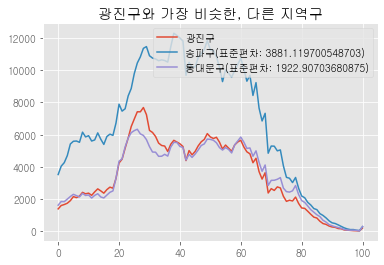

In [2]:
df = pd.read_csv('C:/Users/mink9/OneDrive/바탕 화면/오픈소스SW입문/서울시20년12월연령별인구현황.csv',encoding = "CP949")

a = np.array(df)
for i in range(1,26):
    for j in range(3,104):
        a[i][j] = int(a[i][j].replace(',',''))
data = a[1:26,3:104]

max = 0
min = 10000000000
for i in range(1,25):
    if i == 4:
        continue
    sum = 0
    for j in range(0,101):
        sub = math.pow(data[i][j]-data[4][j],2)
        sum = sum + sub
    if sum > max:
        max = sum
        idx_max = i
        region_max = a[i+1][0]
    elif sum < min:
        min = sum
        idx_min = i 
        region_min = a[i+1][0]

region_max = region_max.split()[1]
region_min = region_min.split()[1]

age = np.arange(0,101,1)
plt.style.use('ggplot')
plt.title("광진구와 가장 비슷한, 다른 지역구")

plt.plot(age,data[4],label="광진구")
plt.plot(age,data[idx_max],label=region_max+"(표준편차: "+str(np.std(data[idx_max]))+")")
plt.plot(age,data[idx_min],label=region_min+"(표준편차: "+str(np.std(data[idx_min]))+")")
plt.legend()
plt.show()
